# **Computer Vision Track - Assignment 1**
## **Artificial Neural Network for Image Classification**

In this assignment, we explore the fundamentals of building a neural network for image classification. Image classification is a core task in computer vision, where the goal is to correctly identify and categorize objects in images. We will design and implement a neural network from scratch using popular machine learning libraries, applying key concepts such as activation functions, and backpropagation. By training the model on a labeled dataset, we aim to evaluate its performance and understand how different network architectures influence classification accuracy. This assignment serves as a practical introduction to deep learning in computer vision.

====================================================================================================

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 1**

The code below imports essential libraries for building and training an artificial neural network (ANN) using PyTorch.
1) <blue>**torch**</blue> and <blue>**torch.nn**</blue> provide core functionality for tensors and neural networks.
2) <blue>**optim**</blue> offers optimization algorithms (like <green>**Adam**</green>).
3) <blue>**torchvision**</blue> helps with image-related tasks, and transforms aids in image preprocessing.
4) <blue>**DataLoader**</blue> is used to load datasets in batches.
5) Libraries like <blue>**matplotlib**</blue>, <blue>**seaborn**</blue>, and <blue>**sklearn.metrics**</blue> help visualize results and evaluate the model using metrics such as <green>**accuracy**</green>, <green>**precision**</green>, <green>**recall**</green> etc.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 2**
1) The <blue>**device**</blue> variable ensures the model runs on a <green>**GPU**</green> if available; otherwise, it falls back to a <green>**CPU**</green>.
2) The <blue>**transform**</blue> object defines the <green>**preprocessing**</green> steps for images
3) <blue>**ToTensor()**</blue> converts images to tensors.
4) <blue>**Normalize((0.5,), (0.5,))**</blue> normalizes the images to a range between -1 and 1, helping with better convergence during training.

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 3**
1) This code outlines loading the <blue>**MNIST**</blue> dataset for <green>**handwritten digit recognition**</green>.
2) The <blue>**train_loader**</blue> and <blue>**test_loader**</blue> are used to load the datasets in batches of 64, with shuffling applied only to the training set.
3) The <blue>**dataiter**</blue> and next commands allow viewing a batch of images and labels, which can be useful for visualization before training.


Note: The placeholders **"None"** need to be replaced with the correct dataset-loading code.

In [3]:
# Load the MNIST dataset
# TODO: Download and load the training and test sets using torchvision.datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.59MB/s]


In [4]:
# Check if data loaded correctly
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Check one sample
image, label = train_dataset[0]
print(f"\nImage shape: {image.shape}")
print(f"Label: {label}")

Training samples: 60000
Test samples: 10000

Image shape: torch.Size([1, 28, 28])
Label: 5


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classifying MNIST digits.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes (digits 0–9)**</green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [5]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers (Flatten, Fully Connected, Activation functions)
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like MNIST.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [6]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [7]:
# Training the network
num_epochs = 3
ls_losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device
        images = images.to(device).view(-1, 28*28)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.detach().cpu().numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/3], Step [100/938], Loss: 0.4811
Epoch [1/3], Step [200/938], Loss: 0.2629
Epoch [1/3], Step [300/938], Loss: 0.5131
Epoch [1/3], Step [400/938], Loss: 0.3659
Epoch [1/3], Step [500/938], Loss: 0.2659
Epoch [1/3], Step [600/938], Loss: 0.2076
Epoch [1/3], Step [700/938], Loss: 0.2858
Epoch [1/3], Step [800/938], Loss: 0.4873
Epoch [1/3], Step [900/938], Loss: 0.3918
Epoch [2/3], Step [100/938], Loss: 0.2313
Epoch [2/3], Step [200/938], Loss: 0.1501
Epoch [2/3], Step [300/938], Loss: 0.3304
Epoch [2/3], Step [400/938], Loss: 0.2281
Epoch [2/3], Step [500/938], Loss: 0.2269
Epoch [2/3], Step [600/938], Loss: 0.2311
Epoch [2/3], Step [700/938], Loss: 0.1790
Epoch [2/3], Step [800/938], Loss: 0.0673
Epoch [2/3], Step [900/938], Loss: 0.3479
Epoch [3/3], Step [100/938], Loss: 0.1037
Epoch [3/3], Step [200/938], Loss: 0.1430
Epoch [3/3], Step [300/938], Loss: 0.2716
Epoch [3/3], Step [400/938], Loss: 0.0856
Epoch [3/3], Step [500/938], Loss: 0.2026
Epoch [3/3], Step [600/938], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

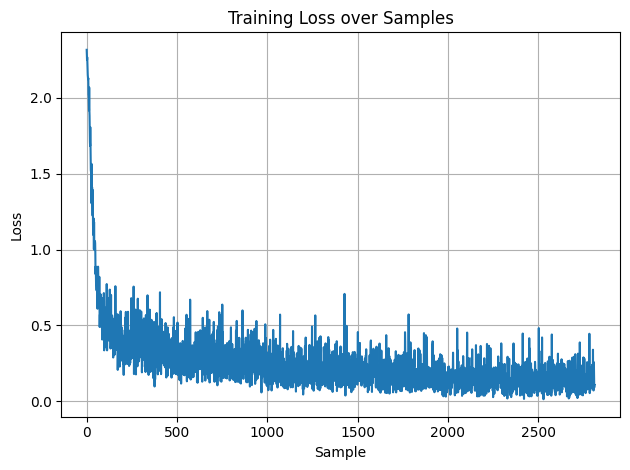

In [8]:
# Plot Losses
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel("Sample")
plt.ylabel("Loss")
plt.title("Training Loss over Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


It seems there was an issue applying the fix directly to the existing cell. The error "TypeError: 'str' object is not callable" occurs because `plt.xlabel` and `plt.ylabel` were incorrectly assigned string values instead of being called as functions.

The corrected code below calls `plt.xlabel()` and `plt.ylabel()` as functions to set the axis labels for the loss plot.

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Accuracy Calculation**</blue>: The model's predictions are compared to the true labels, and the <green>**accuracy**</green> is calculated.
4) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

At the end of testing, the accuracy of the model on the test dataset is printed.

Note: Replace the placeholders **"None"** with the appropriate code for data movement, prediction, and storing results.

In [9]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # TODO: Move images and labels to the device
        images = images.to(device).view(-1, 28*28)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # TODO: Append predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 94.99%


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 9**
This code calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

Accuracy: 94.99%
Precision: 0.9513
Recall: 0.9499
F1-Score: 0.9501


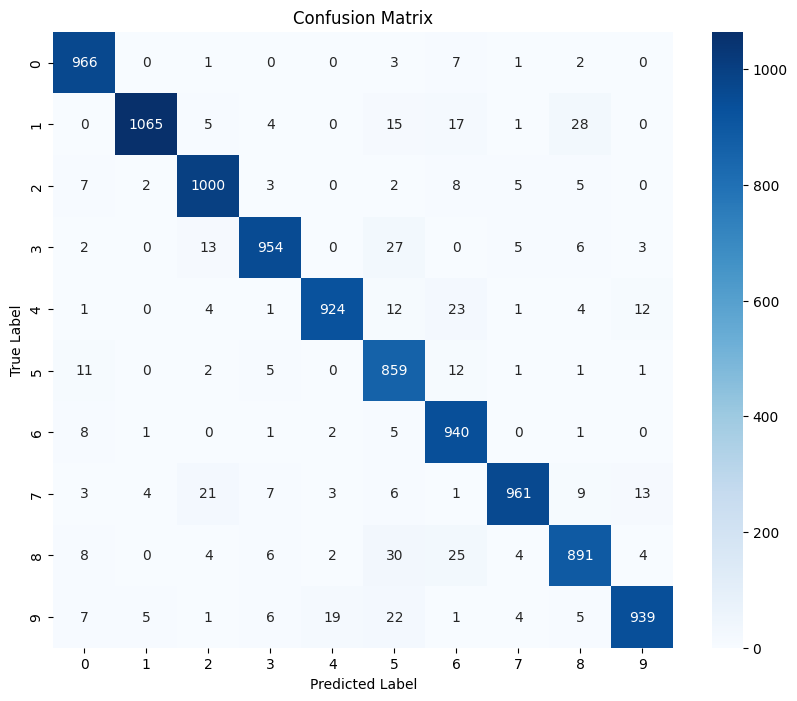

In [10]:
# TODO: Convert predictions and labels to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score
# TODO: Use sklearn to calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# TODO: Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **Step 10 (For Advanced Level, optional for Basic Level)**

Hyperparameter tuning is a crucial step in optimizing the performance of a neural network. It involves finding the best set of hyperparameters that control the learning process and the model's architecture, such as the learning rate, batch size, number of epochs, and the number of units in each layer.

Techniques like grid search or random search can be employed to systematically explore different combinations of these hyperparameters and identify the values that yield the best results on a validation set. This process helps in improving the model's accuracy and generalization capabilities.

In [11]:
# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'num_epochs': [3, 5]
}

best_accuracy = 0
best_params = {}

# Iterate through hyperparameter combinations
for lr in param_grid['learning_rate']:
    for bs in param_grid['batch_size']:
        for epochs in param_grid['num_epochs']:
            print(f"Training with LR: {lr}, Batch Size: {bs}, Epochs: {epochs}")

            # Re-initialize model, loss, and optimizer
            model = ANN().to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Update DataLoader with new batch size
            train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
            test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

            model.train()

            # Training loop (similar to Step 6)
            for epoch in range(epochs):
                for i, (images, labels) in enumerate(train_loader):
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)

                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # Evaluation loop (similar to Step 8)
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total  # ✅ Calculate accuracy percentage
                print(f'Accuracy for LR: {lr}, Batch Size: {bs}, Epochs: {epochs}: {accuracy:.2f}%')

                # Store best parameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'learning_rate': lr, 'batch_size': bs, 'num_epochs': epochs}

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.2f}%")

Training with LR: 0.001, Batch Size: 32, Epochs: 3
Accuracy for LR: 0.001, Batch Size: 32, Epochs: 3: 96.90%
Training with LR: 0.001, Batch Size: 32, Epochs: 5
Accuracy for LR: 0.001, Batch Size: 32, Epochs: 5: 97.17%
Training with LR: 0.001, Batch Size: 64, Epochs: 3
Accuracy for LR: 0.001, Batch Size: 64, Epochs: 3: 96.15%
Training with LR: 0.001, Batch Size: 64, Epochs: 5
Accuracy for LR: 0.001, Batch Size: 64, Epochs: 5: 97.17%
Training with LR: 0.01, Batch Size: 32, Epochs: 3
Accuracy for LR: 0.01, Batch Size: 32, Epochs: 3: 91.15%
Training with LR: 0.01, Batch Size: 32, Epochs: 5
Accuracy for LR: 0.01, Batch Size: 32, Epochs: 5: 91.49%
Training with LR: 0.01, Batch Size: 64, Epochs: 3
Accuracy for LR: 0.01, Batch Size: 64, Epochs: 3: 93.31%
Training with LR: 0.01, Batch Size: 64, Epochs: 5
Accuracy for LR: 0.01, Batch Size: 64, Epochs: 5: 94.24%

Best Hyperparameters:
{'learning_rate': 0.001, 'batch_size': 32, 'num_epochs': 5}
Best Accuracy: 97.17%


### **Step 11 (For Advanced Level, optional for Basic Level)**

Regularization is a set of techniques used to prevent overfitting in neural networks. Overfitting occurs when a model learns the training data too well, including the noise and outliers, which negatively impacts its performance on unseen data. Regularization methods add a penalty to the loss function or modify the network architecture to discourage the model from becoming too complex. Common regularization techniques include L1 and L2 regularization, and dropout.

In [12]:
# Add regularization (Dropout) to the ANN model
class ANN_Regularized(nn.Module):
    def __init__(self):
        super(ANN_Regularized, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the regularized model
model_regularized = ANN_Regularized().to(device)

# Define loss function and optimizer
criterion_regularized = nn.CrossEntropyLoss()
optimizer_regularized = optim.Adam(model_regularized.parameters(), lr=0.001)

print("Regularized ANN model defined with dropout layers.")

Regularized ANN model defined with dropout layers.
